<a href="https://colab.research.google.com/github/patrickctrf/projeto-ia376/blob/e1gr/E3/notebooks/MIR_GANSynth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas Necessárias:

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt 
import numpy as np 
import librosa 
import librosa.display 
import librosa.feature
import seaborn as sns
import matplotlib as mpl
import scipy
from scipy import signal
from scipy.signal import find_peaks

#Configuração de Parâmetros no Seaborn

In [2]:
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
 
sns.set_context("notebook", rc={"font.size":20,
                                "axes.titlesize":24,
                                "axes.labelsize":18})

#Função para o Music Information Retrieval

In [3]:
def mir(real : np.ndarray, sintetizado : np.ndarray, SR : int,
        pico_min_real: int = None, pico_min_sintetizado: int = None):

    if pico_min_real == None:
        pico_min_real = 100
    else:
        pico_min_real = pico_min_real

    if pico_min_sintetizado == None:
        pico_min_sintetizado = 100
    else:
        pico_min_sintetizado = pico_min_sintetizado
       
    #SR = sample rate
    audios =  [real,sintetizado]
    saves = ['Sintetizado','Sintetizado']
    picos = [pico_min_real, pico_min_sintetizado]
    figs = []

    for i in range(len(audios)):
        
        # Áudio

        audio = plt.figure(figsize=(10, 5))
        t = np.arange(len(audios[i]))/SR
        plt.title('Áudio '+saves[i])
        plt.xlabel('Tempo (s)')
        plt.ylabel('Amplitude')
        plt.minorticks_on()
        plt.plot(t,audios[i])
        plt.tight_layout()
        plt.savefig('/content/'+'Audio_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(audio)

        #Feature 01 - STFT

        stft = plt.figure(figsize=(10, 5))
        Y = np.fft.fft(audios[i]) 
        freq = np.abs((np.fft.fftfreq(audios[i].size, d=1/SR)))
        mag= np.abs(Y)
        a1, pico = scipy.signal.find_peaks(mag,height=picos[i])
        plt.plot(freq, mag)
        plt.title('STFT Áudio '+ saves[i]) 
        plt.xlabel('Frequência (Hz)')
        plt.xlim([0, freq[a1].max()+250])
        plt.ylim([0, mag[a1].max()+250])

        for x,y in zip(freq[a1],list(pico.values())[0]):
            label = "{:.2f}".format(x),"{:.2f}".format(y)
            plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 fontsize=10,
                 ha='center') 
            
        plt.ylabel('Magnitude')
        plt.minorticks_on()
        plt.tight_layout()
        plt.savefig('/content/'+'STFT_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(stft)

        #Feature 02 : Espectrograma

        espec = plt.figure(figsize=(15, 10))
        D = librosa.stft(audios[i])
        rp = np.max(np.abs(D))
        plt.subplot(3, 1, 1)
        librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), 
                                 y_axis='log', x_axis='time')
        plt.colorbar()
        plt.title('Espectrograma Áudio '+ saves[i])
        plt.xlabel('Tempo (s)')
        plt.ylabel('Frequência (Hz)')
        plt.minorticks_on()
        plt.tight_layout()
        plt.savefig('/content/'+'Espectro_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(espec)

        #Feature 03 : Cromagrama

        chroma = plt.figure(figsize=(15, 10))
        S = np.abs(librosa.stft(audios[i], n_fft=4096))**2
        ch = librosa.feature.chroma_stft(S=S, sr=SR)
        plt.subplot(3, 1, 1)
        librosa.display.specshow(ch, y_axis='chroma', x_axis='time')
        plt.colorbar()
        plt.title('Cromagrama Áudio '+ saves[i])
        plt.xlabel('Tempo (s)')
        plt.ylabel('Classe de Afinação')
        plt.minorticks_on()
        plt.tight_layout()
        plt.savefig('/content/'+'Croma_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(chroma)

        #Feature 04 : Mel Espectrograma

        melspec = plt.figure(figsize=(15, 4))
        D1 = np.abs(librosa.stft(audios[i]))**2
        S1 = librosa.feature.melspectrogram(S=D1)
        librosa.display.specshow(librosa.power_to_db(S1,ref=rp),y_axis='mel',
                                 fmax=8000,x_axis='time')
        plt.colorbar()
        plt.title('Mel Espectrograma Áudio ' + saves[i])
        plt.xlabel('Tempo (s)')
        plt.ylabel('Frequência (Hz)')
        plt.minorticks_on()
        plt.tight_layout()
        plt.savefig('/content/'+'Melspec_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(melspec)

        #Feature 05 : MFCC

        mfcc = plt.figure(figsize=(15, 10))
        mfccs1 = librosa.feature.mfcc(y=audios[i], sr=SR, n_mfcc=40)
        plt.subplot(3, 1, 1)
        librosa.display.specshow(mfccs1,x_axis='time')
        plt.colorbar()
        plt.title('MFCC Áudio ' + saves[i])
        plt.xlabel('Tempo (s)')
        plt.ylabel('MFCC Coeficientes')
        plt.minorticks_on()
        plt.tight_layout()
        plt.savefig('/content/'+'MFCC_'+ saves[i] + '.svg', format='svg')
        plt.show()
        figs.append(mfcc)

    #Feature 06 : RMS

    rms = plt.figure(figsize=(10, 5))
    rms1 = librosa.feature.rms(y=audios[0])
    rms2 = librosa.feature.rms(y=audios[1])
    ax = rms.add_subplot(111)
    ax.plot(rms1.T, label = 'Real')
    ax2 = ax.twinx()
    ax2.plot(rms2.T,color = 'r', label = 'Sintetizado')
    plt.title('RMS dos Áudios')
    ax.set_ylabel(r'RMS - Real')
    ax2.set_ylabel(r'RMS - Sintetizado')
    rms.legend()
    plt.tight_layout()
    plt.minorticks_on()
    plt.savefig('/content/'+'RMS_'+ saves[i] + '.svg', format='svg')
    plt.show()
    figs.append(rms)

    #Feature 07 : Espectral Bandwith

    band = plt.figure(figsize=(10, 5))
    bw1 = librosa.feature.spectral_bandwidth(y=audios[0], sr=SR)
    bw2 = librosa.feature.spectral_bandwidth(y=audios[1], sr=SR)
    plt.title('Espectral Bandwidth dos Áudios')
    ax = band.add_subplot(111)
    ax.plot(bw1.T, label = 'Real')
    ax2 = ax.twinx()
    ax2.plot(bw2.T, color = 'r', label = 'Sintetizado')
    plt.xlabel('Frequência (Hz)')
    ax.set_ylabel(r'Freq Bandwith (Hz) - Real')  
    ax2.set_ylabel(r'Freq Bandwith (Hz) - Sint.')  
    band.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig('/content/'+'Bandw_'+ saves[i] + '.svg', format='svg')
    plt.show()
    figs.append(band)
 
    #Feature 08 : Espectral Rolloff

    roll = plt.figure(figsize=(10, 5))
    rolloff1 = librosa.feature.spectral_rolloff(y=audios[0], sr=SR)
    rolloff2 = librosa.feature.spectral_rolloff(y=audios[1], sr=SR)
    plt.title('Espectral Rolloff dos Áudios')
    ax = roll.add_subplot(111)
    ax.plot(rolloff1.T, label = 'Real') 
    ax2 = ax.twinx()
    ax2.plot(rolloff2.T, color = 'r', label = 'Sintetizado') 
    plt.xlabel('Frequência (Hz)')
    ax.set_ylabel(r'Freq Rolloff (Hz) - Real')  
    ax2.set_ylabel(r'Freq Rolloff (Hz) - Sint.') 
    roll.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig('/content/'+'Rolloff_'+ saves[i] + '.svg', format='svg')
    plt.show()
    figs.append(roll)

    #Feature 09 : Espectral Flatness

    flatness = plt.figure(figsize=(10, 5))
    flatness1 = librosa.feature.spectral_flatness(y=audios[0])
    flatness2 = librosa.feature.spectral_flatness(y=audios[1])
    plt.title('Espectral Flatness dos Áudios')
    ax = flatness.add_subplot(111)
    plt.plot(flatness1.T, label = 'Real')
    ax2 = ax.twinx()
    ax2.plot(flatness2.T, color = 'r', label = 'Sintetizado')  
    plt.xlabel('Frequência (Hz)')
    ax.set_ylabel(r'Flatness - Real') 
    ax2.set_ylabel(r'Flatness - Sintetizado')   
    flatness.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig('/content/'+'flatness_'+ saves[i] + '.svg', format='svg')
    plt.show()
    figs.append(flatness)

    #Feature 10 : Zero Crossing Rate

    zero = plt.figure(figsize=(10, 5))
    zero1 = librosa.feature.zero_crossing_rate(y=audios[0])
    zero2 = librosa.feature.zero_crossing_rate(y=audios[1])
    plt.title('Zero Crossing Rate dos Áudios')
    ax = zero.add_subplot(111)
    ax.plot(zero1.T, label = 'Real')
    ax2 = ax.twinx()
    ax2.plot(zero2.T, color = 'r', label = 'Sintetizado') 
    plt.xlabel('Frequência (Hz)')
    ax.set_ylabel(r'ZCR - Real')  
    ax2.set_ylabel(r'ZCR - Sintetizado')  
    zero.legend()
    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig('/content/'+'Zero_'+ saves[i] + '.svg', format='svg')
    plt.show()
    figs.append(zero) 

    return figs

#Testando a função MIR

In [4]:
!gdown 12uBSUIhdg8ZLFtHaG__8Hrh0wUbKOgPP
!gdown 13NEZcbA9TQX3TR8j7Mnd_mtFbhd3CRZG

Downloading...
From: https://drive.google.com/uc?id=12uBSUIhdg8ZLFtHaG__8Hrh0wUbKOgPP
To: /content/h01.wav
100% 130k/130k [00:00<00:00, 72.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=13NEZcbA9TQX3TR8j7Mnd_mtFbhd3CRZG
To: /content/h02.wav
100% 130k/130k [00:00<00:00, 61.2MB/s]


In [5]:
from IPython.display import Audio

In [6]:
Real, SR=librosa.load('h01.wav', sr=None, mono=True)
Audio(data=Real, rate=SR)

In [7]:
Sintetizado, SR=librosa.load('h02.wav', sr=None, mono=True)
Audio(data=Sintetizado, rate=SR)

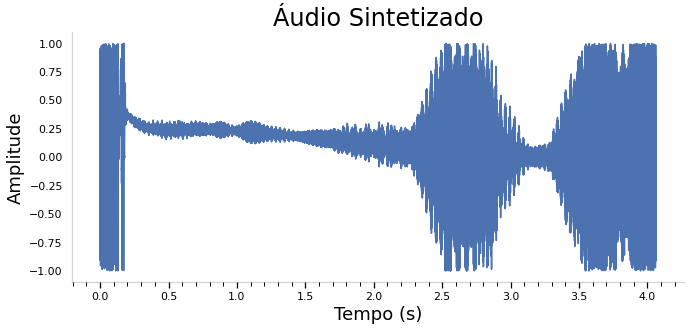

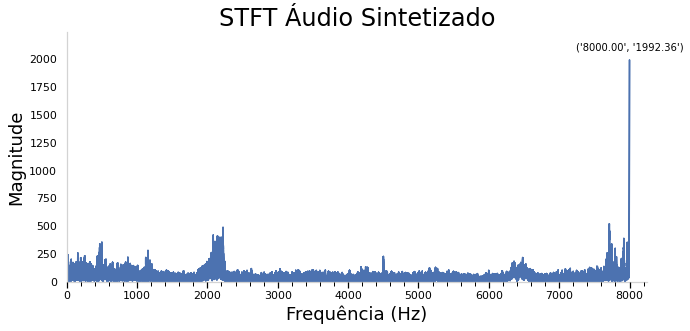

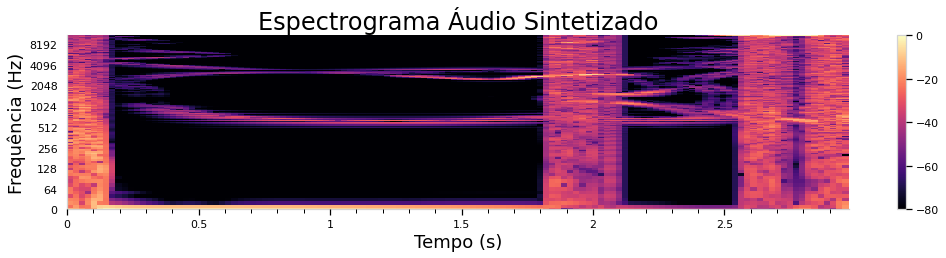

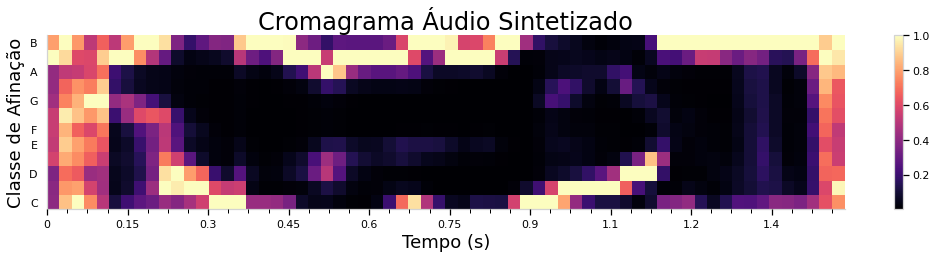

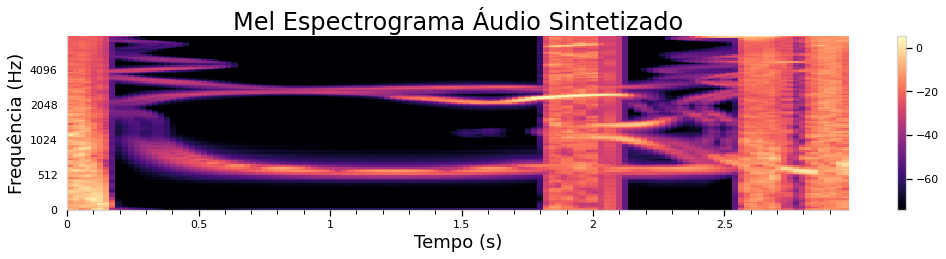

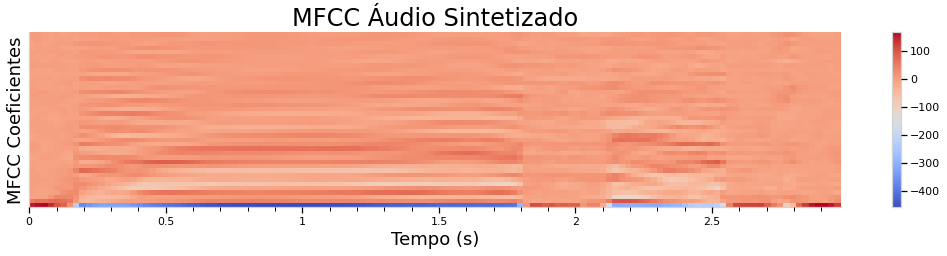

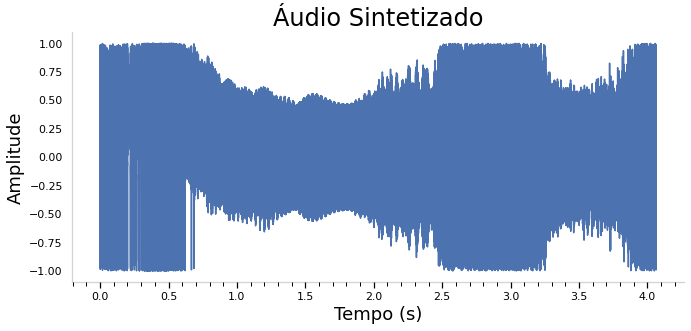

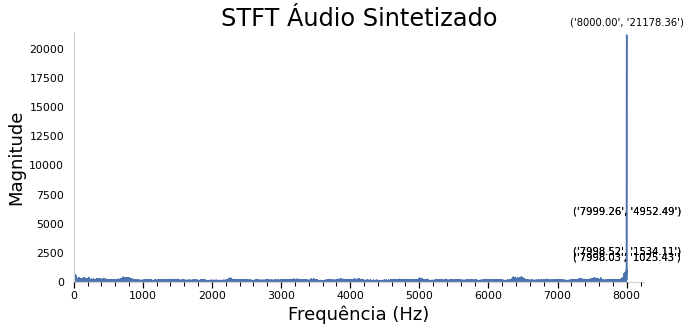

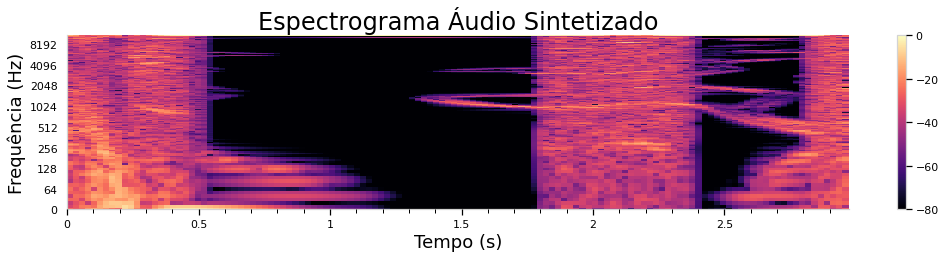

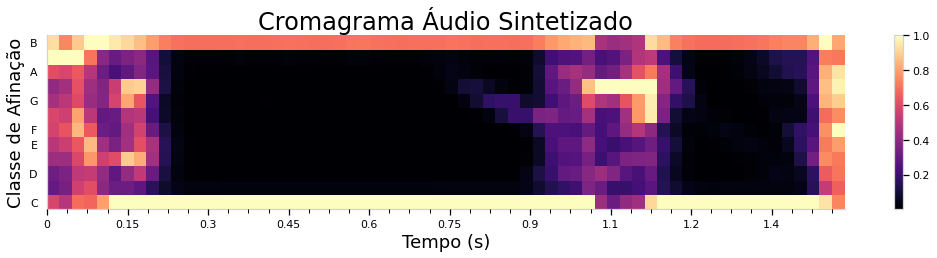

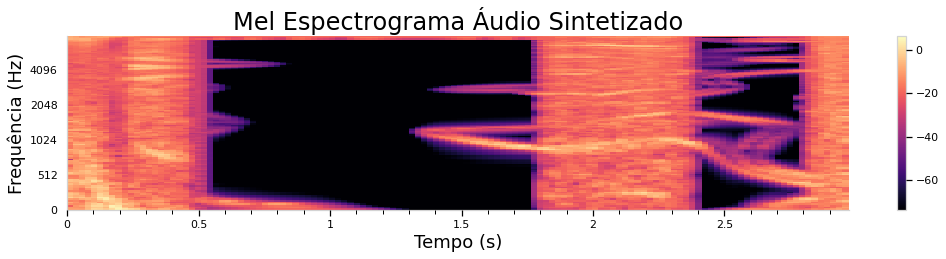

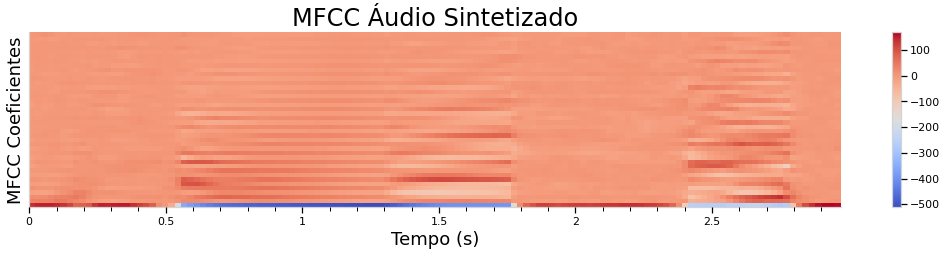

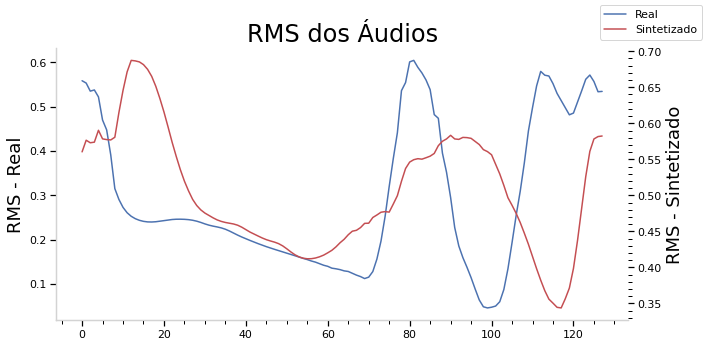

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:158: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


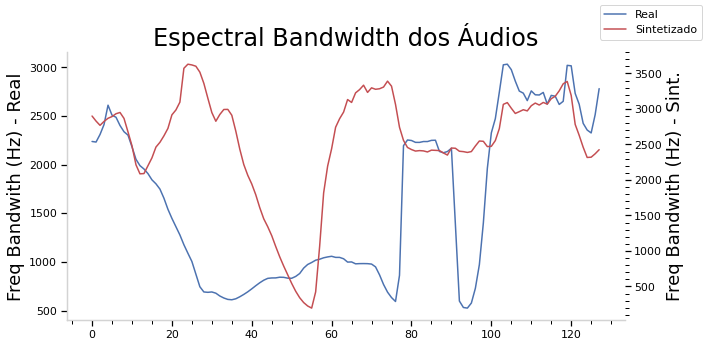

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:178: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


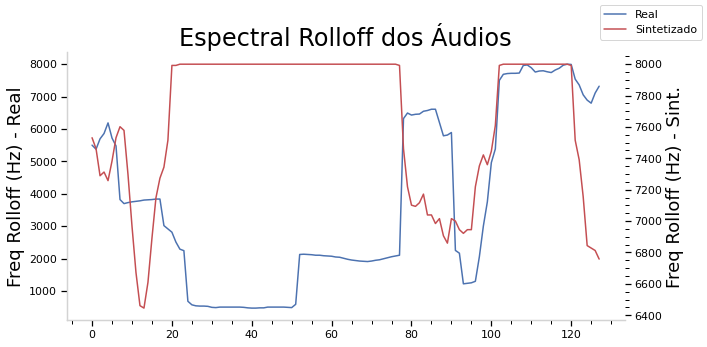

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:198: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


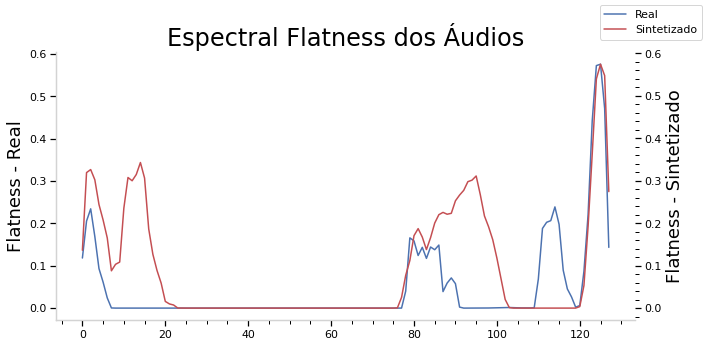

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


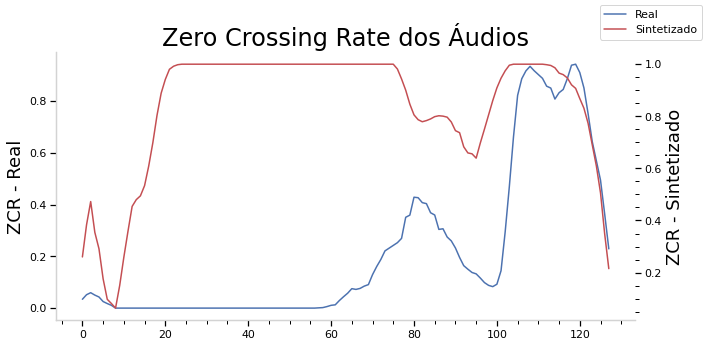

In [8]:
a = mir(Real,Sintetizado,SR,pico_min_real=1000,pico_min_sintetizado=1000)